##Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Imports

In [ ]:
import pandas as pd
import numpy as np
import torch
import tensorflow as tf
from sklearn.model_selection import train_test_split
import re

## Load Data

In [ ]:
# Load the FAANG dataset for StockTwits
# uncomment to choose file to load
# 1st link is for percentage change for FAANG data
# 2nd file is for binary classification for FAANG

df = pd.read_csv('/content/drive/My Drive/Data/Combined_FAANG_percentage_2.2.csv', sep=',')
# df = pd.read_csv('/content/gdrive/MyDrive/Capstone/Combined_FAANG_binary_previous.csv')

In [ ]:
# Change the year as per the requirement, Currently 1 year data is selected
df.drop(df[df['Date'] <= '2019-07-20'].index, inplace = True) 
df

,symbol,message,datetime,user,message_id,Date,Time,label
1,AAPL,aapl watching gap fill 169 20,2018-11-24 07:02:32,1665234.0,146068732.0,2018-11-24,07:02:32,1
3,AAPL,aapl,2020-01-27 07:07:03,1229493.0,191978042.0,2020-01-27,07:07:03,0
5,AAPL,aapl loads cash hand great service business lo...,2018-11-01 23:39:14,123291.0,143688765.0,2018-11-01,23:39:14,1
8,AAPL,qq became euphoric calls exp week aiming ath f...,2020-05-13 02:13:00,2250451.0,212222428.0,2020-05-13,02:13:00,0
9,AAPL,spy novices like davey day trader lose money s...,2020-06-24 11:12:09,543250.0,222404886.0,2020-06-24,11:12:09,0
...,...,...,...,...,...,...,...,...
2566843,NFLX,nflx last 3 months big green candles followed ...,2019-05-01 18:21:25,637003.0,162589986.0,2019-05-01,18:21:25,1
2566848,NFLX,nflx full move key support,2020-03-12 16:52:43,677915.0,199933357.0,2020-03-12,16:52:43,0
2566849,NFLX,spy spx nflx nvda virtually volume today absen...,2019-10-14 18:16:28,55818.0,180328889.0,2019-10-14,18:16:28,1
2566853,NFLX,nflx sister owns kinda thinking telling sell b...,2019-01-11 20:51:22,607557.0,150426203.0,2019-01-11,20:51:22,1


In [ ]:
df["label"].value_counts()

1    548894
0    472556
Name: label, dtype: int64

In [ ]:
# Dropping the neutral values
df.drop(df[df['label'] == 0].index, inplace = True) 
df['label'].value_counts()

 1    451745
-1    371365
Name: label, dtype: int64

In [ ]:
df["label"].replace({-1: 0}, inplace=True) # therefore, 0 - negative, 1 - positive

In [ ]:
df = df.sample(frac=1)

##Train and predict

In [ ]:
# Splitting the data in 90:10 ratio, i.e. 90% as training data and 10% as test data
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.10, random_state=42)

In [ ]:
x_train

362047                                    aapl excellent bit
421955     price returns vs expected daily move gdx vxx p...
138613                                    sell amzn buy aapl
1994325                                         nflx liftoff
2105680                nflx spy totally knew look beat yowza
                                 ...                        
23726      uonek bears salty either way I going fun shit ...
205590     spy notice whenever hf shorts getting killed g...
1407460    amazon pullback creates 39 major buying opport...
1746008            dis heating earnings get three year range
313513     78 instruments 1h midday update updated elliot...
Name: message, Length: 740799, dtype: object

In [ ]:
y_test.value_counts()

1    45159
0    37152
Name: label, dtype: int64

In [ ]:
# Defining GridSearch pipeline parameter for Random forest classification
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
RandomForestClassifier(class_weight='blanced')
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier())])
tuned_parameters = {
    'tfidf__use_idf': ['True'],
    'clf__max_features':['sqrt'],
    'clf__max_depth' : [5],
    'clf__n_estimators':[200],
    'clf__class_weight': ['balanced']
}

In [ ]:
# Get the keys values for parameters to use in pipeline
text_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__bootstrap', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__max_samples', 'clf__min_impurity_decrease', 'clf__min_impurity_split', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__n_estimators', 'clf__n_jobs', 'clf__oob_score', 'clf__random_state', 'clf__verbose', 'clf__warm_start'])

In [ ]:
# Traiing the model
from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters)
clf.fit(x_train, y_train)

# Print the classification report
print(classification_report(y_test, clf.predict(x_test), digits=4))

              precision    recall  f1-score   support

           0     0.5059    0.5126    0.5092     47135
           1     0.5776    0.5711    0.5743     55010

    accuracy                         0.5441    102145
   macro avg     0.5418    0.5418    0.5418    102145
weighted avg     0.5445    0.5441    0.5443    102145



In [ ]:
# Print the best parameters
clf.best_params_

{'clf__class_weight': 'balanced',
 'clf__criterion': 'gini',
 'clf__max_depth': 5,
 'clf__max_features': 'sqrt',
 'clf__n_estimators': 200}

In [ ]:
# Print the best estimators
clf.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=5,
                                        max_features='sqrt',
                                        max_leaf_nodes=None, max_sam

In [ ]:
import pickle

#Save Vectorizer
vec_file = '/content/drive/My Drive/Capstone/traditionalML/Random_forest_3label_vectorizerv1.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

# Save the model
with open('/content/drive/My Drive/Capstone/traditionalML/Random_forest_3labelv1.model', 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
predicted_forest = clf.predict(x_test)

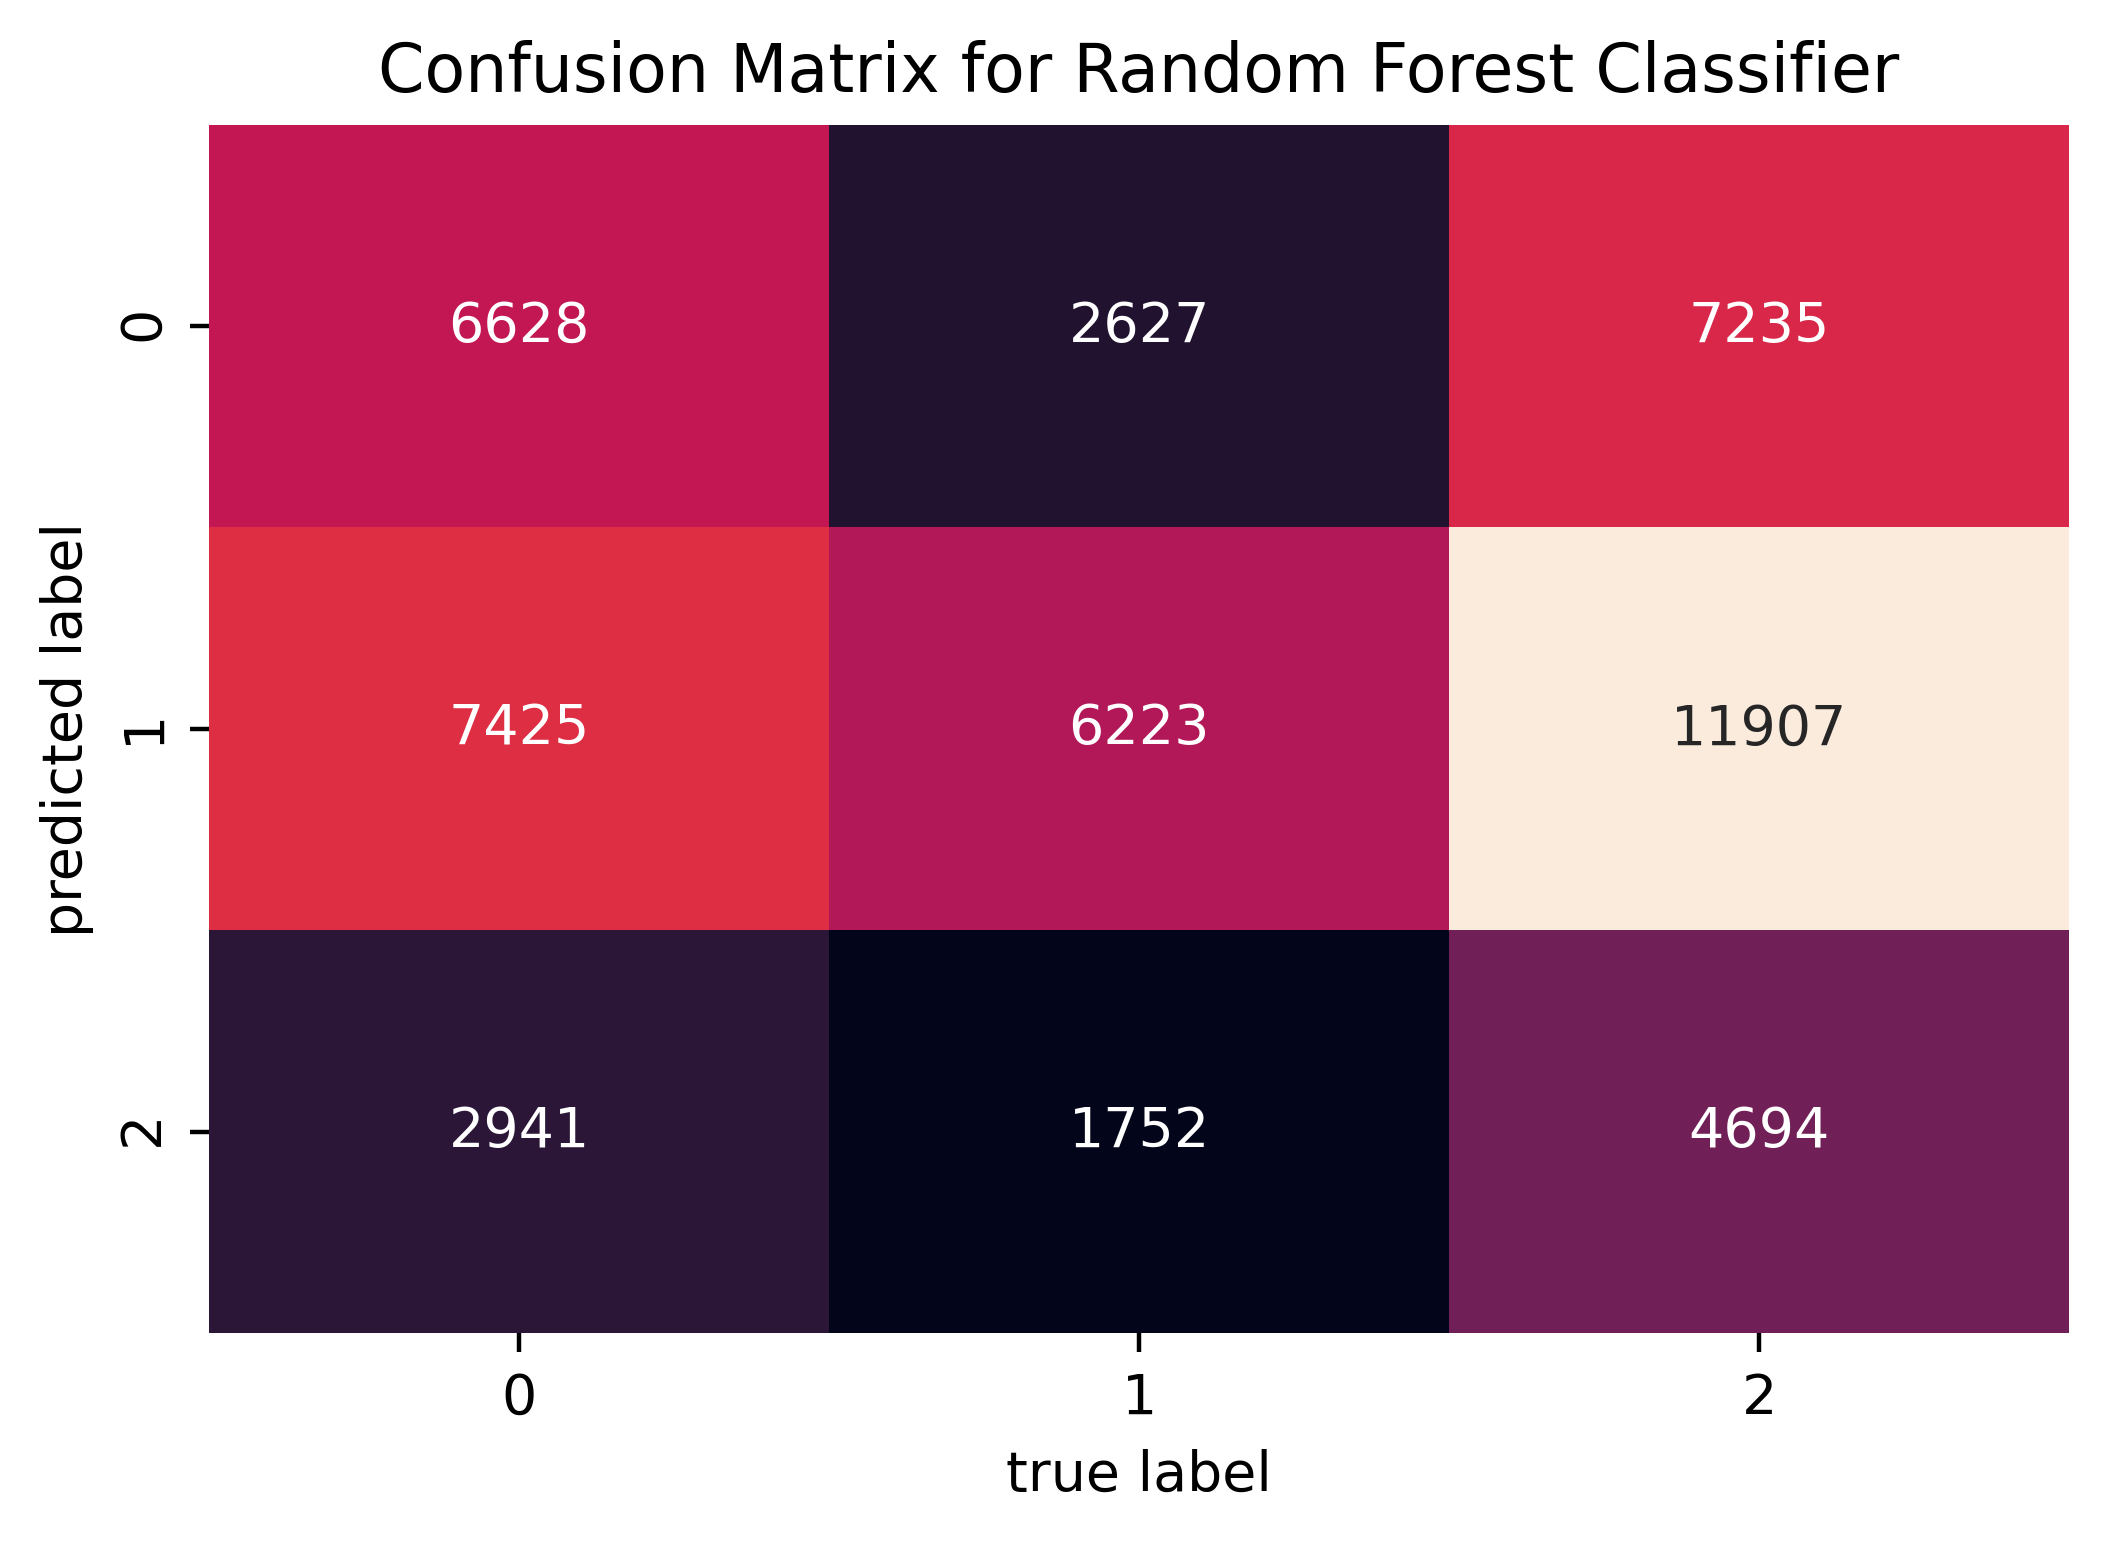

In [ ]:
# Generate the confusion matrix for the predicted values
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=400)
mat = confusion_matrix(y_test, predicted_forest)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig("assets/confusion_matrix.png")
plt.show()